In [14]:
#*********************************************************************
#Creators - Shreejit Gajanan Deshmukh, Venkata Sai Advaith Kandiraju *
#PRCV Sprint 23' - Final project Part 2                              *
#Object detection and driving assistance                             *
#*********************************************************************

In [15]:
#***********************************************************************
#This section is for object detection and providing driving assistance,*
#mainly vehicle detections in the video frame of our driving car. The  *
#YOLO v8 nano is used for object detection and all objects are kept    *
#open for detection as in case of uncertainty the unknown object should*
#raise an alert to the driver.                                         *
#***********************************************************************

In [16]:
#Imporing libraries
from ultralytics import YOLO
import cv2
import cvzone
import math
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#Loading YOLO ver 8 nano model for car detection
model = YOLO("yolov8n.pt")

In [18]:
image = cv2.imread("obj_recog.png")

In [19]:
results = model(image)


0: 384x640 6 cars, 46.0ms
Speed: 2.1ms preprocess, 46.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
image.shape

(713, 1281, 3)

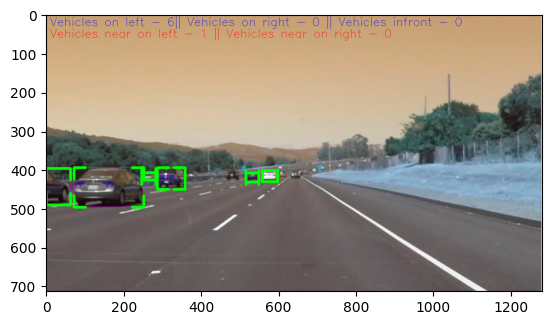

In [21]:
#Loop through detections
#number of cars and its position wrt center of the car
right = 0
left = 0
ahead = 0

#Classes names from YOLOv8 loaded till vehicles, there are over 80 classes in total
Classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',]

#Flag for raising alarm if a car is close
alert_flag = 0
close_flag = 0
close_left = 0
close_right = 0
close_ahead = 0

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls = int(box.cls[0])
        #Only proceeding if identified class is road vehicle
        if (cls == 1 or cls == 2 or cls == 3 or cls == 5 or cls == 7):
            #Finding co-ordinates of the bounding boxes for later operations
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            #width and height of the boxes
            w, h = x2 -x1, y2 - y1

            #Drawing boxes around recognized objects
            bbox = x1, y1, w, h
            cvzone.cornerRect(image, bbox)

            #finding centers of each box to segragate
            center = ((x1 + x2) / 2, (y1 + y2) / 2)

            #Finding area to compute distance from our vehicle
            area = w * h

    #         print(center)
    #         print(area)

            frame_area = image.shape[0] * image.shape[1]

            #If the car area is beyond a limit it's too close, we will raise a flag for the driver
            #With experimentation current area pecentage is 2% for close vehicles.
            if (area > (frame_area*2) / 100):
                close_flag = 1
                alert_flag = 1
            else:
                close_flag = 0

            #Segregating
            ahead_tolerance = (image.shape[1] * 3) / 100
            if center[0] > image.shape[1] / 2 + ahead_tolerance:
                right += 1
                if(close_flag == 1):
                    close_right += 1
            if center[0] < image.shape[1] / 2 - ahead_tolerance:
                left += 1
                if(close_flag == 1):
                    close_left += 1
            else:
                ahead += 1
                if(close_flag == 1):
                    close_ahead += 1

    #         print(left)
    #         print(ahead)
    #         print(close_left)
    #         print(close_right)
        else:
            pass

#Adding information from frames to image
text_far = f"Vehicles on left - {left}|| Vehicles on right - {right} || Vehicles infront - {ahead}"
text_near_sides = f"Vehicles near on left - {close_left} || Vehicles near on right - {close_right}"
text_front = "ALERT - Vehicle ahead -- SLOW DOWN"

#If close cars are there then alert the driver
if(alert_flag == 1):
    cv2.putText(image, text_near_sides, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
    if(close_ahead > 0):
        cv2.putText(image, text_front, (600, 90), 2, (255, 0, 0))
        
#Normal cars count
cv2.putText(image, text_far, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))

plt.imshow(image)

In [11]:
#Checking out all the class names available in the model
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou